# Data Quality

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [18]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [19]:
import IPython
js_code = '''
document.querySelector("#output-area").appendChild(document.createTextNode("hello world!"));
'''
display(IPython.display.Javascript(js_code))

<IPython.core.display.Javascript object>

In [20]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'Sales'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

ApiRequestError: ignored

<IPython.core.display.Javascript object>

Saved to photo.jpg


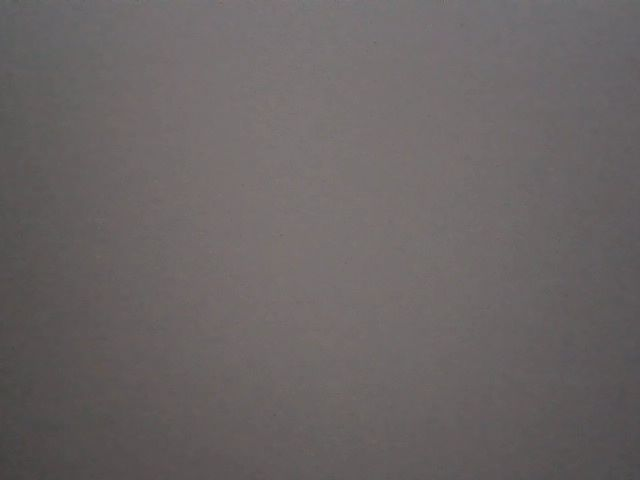

In [21]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [22]:
import numpy as np
import pandas as pd

In [23]:
!pip install --upgrade -q gspread

from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [24]:
def get_df(file_name, location):
  worksheet = gc.open(file_name).get_worksheet(location)
  rows = worksheet.get_all_values()
  head = rows[0]
  data = rows[1:]
  df = pd.DataFrame.from_records(data, columns=head)
  return df

In [25]:
employees = get_df('Sales', 0)
employees

IndexError: ignored

In [ ]:
customers = get_df('Sales', 1)
customers

,Customer ID,First Name,Last Name,City
0,20001,Jack,Ward,San Jose
1,20002,Steven,Martinez,San Francisco
2,20003,Jessica,Collins,San Jose
3,20004,Carie,Robinson,San Francisco
4,20005,Zack,Peterson,Oakland
5,20006,Bianca,Sanchez,San Francisco
6,20007,James,Owen,Oakland
7,20008,Lisa,Smith,San Francisco
8,20009,Daniel,Yasukawa,Oakland
9,20010,Lauren,Pham,San Jose


In [ ]:
products = get_df('Sales', 2)
products

,Product ID,Product Name,Price,Supplier ID,Supplier Name
0,30001,T-Shirt,12.98,40004,Studio Warehouse
1,30002,Tooth Paste,4.5,40002,BioMed Inc
2,30003,Speakers,56.99,40005,"CompTech, Inc"
3,30004,Pants,34.35,40003,FashionRUs
4,30005,Microphone,46.21,40001,"Music Vibrations, Inc"
5,30006,Tie,11.09,40003,FashionRUs
6,30007,Chap Stick,3.67,40002,BioMed Inc
7,30008,Medicine,23.96,40002,BioMed Inc
8,30009,Headphones,31.44,40001,"Music Vibrations, Inc"
9,30010,Lotion,16.77,40002,BioMed Inc


In [ ]:
orders = get_df('Sales', 3)
orders

,Order ID,Customer ID,Product ID,Employee ID,Date
0,50001,20005,30005,10001,17-02-12
1,50002,20003,30008,10011,17-09-03
2,50003,20010,30001,10009,17-11-23
3,50004,20004,30008,10010,17-01-28
4,50005,20008,30012,10002,17-08-11
5,50006,20011,30011,10001,17-04-13
6,50007,20012,30002,10007,17-10-07
7,50008,20002,30001,10004,17-03-09
8,50009,20001,30006,10009,17-12-26
9,20010,50008,30007,10008,09-26


In [ ]:
suppliers = get_df('Sales', 4)
suppliers

,Supplier ID,Name,City
0,40001,"Music Vibrations, Inc",Oakland
1,40002,BioMed Inc,San Francisco
2,40003,FashionRUs,San Jose
3,40004,Studio Warehouse,San Francisco
4,40005,"CompTech, Inc",San Jose
5,400006,WearUps Inc,NY
6,40007,DataQuery Inc,SJ
7,40008,Ropa Inc,Mexico


# Auditing Data

In [ ]:
employees.describe()

,Employee ID,First Name,Last Name,Department,City
count,19,19,19,19,19
unique,17,18,17,7,5
top,10012,Adam,West,Clothes,San Jose
freq,3,2,2,9,7


In [ ]:
employees.groupby('Department')['Department'].count()

Department
                             1
Clothes                      9
Clothes/Electronics          1
Cosmetics                    1
Electronics                  3
N/A                          1
Pharmacy, Health & Beauty    3
Name: Department, dtype: int64

In [ ]:
employees.groupby('City')['City'].count()

City
Oakland          5
SANJOSE,CA       1
SF               1
San Francisco    5
San Jose         7
Name: City, dtype: int64

In [ ]:
customers.groupby('City')['City'].count()

City
Berkeley         1
Frisco           1
Oak Town         1
Oakland          4
San Francisco    5
San Jose         3
Name: City, dtype: int64

In [ ]:
suppliers.groupby('City')['City'].count()

City
Mexico           1
NY               1
Oakland          1
SJ               1
San Francisco    2
San Jose         2
Name: City, dtype: int64

In [ ]:
cities = pd.concat([employees, customers])
cities = pd.concat([cities, suppliers])
cities.groupby('City')['City'].count()

City
Berkeley          1
Frisco            1
Mexico            1
NY                1
Oak Town          1
Oakland          10
SANJOSE,CA        1
SF                1
SJ                1
San Francisco    12
San Jose         12
Name: City, dtype: int64

**Filter records by missing field**

In [ ]:
def missing_fields(df, field):
  missing_data = df[(df[field] == '') | (df[field] == 'N/A') | (df[field] == None) | (df[field] == ' ')]
  return missing_data

In [ ]:
display(missing_fields(employees, 'Last Name'))

,Employee ID,First Name,Last Name,Department,City
15,10014,Nicole,,"Pharmacy, Health & Beauty",Oakland


In [ ]:
display(missing_fields(customers, 'Last Name'))

,Customer ID,First Name,Last Name,City
12,20013,Margret Shang,,Oak Town


**Filter records by incorrect length**

In [ ]:
def incorrect_length(df, field, length):
  incorrect_length = df[df[field].str.len() != length]
  return incorrect_length

In [ ]:
display(incorrect_length(employees, 'Employee ID', 5))

,Employee ID,First Name,Last Name,Department,City
16,3k3d8leu,James,TELLER,Clothes,"SANJOSE,CA"
17,1100123,Carie,Olson,Clothes/Electronics,SF


In [ ]:
display(incorrect_length(products, 'Product ID', 5))

,Product ID,Product Name,Price,Supplier ID,Supplier Name
14,12!d3&)dkc_+@ad,Car,,48350254-5qe,


**Filter records if they do not conform to numerical ids**

In [ ]:
def check_ids_num(df, field):
  non_numbers = df[~df[field].str.contains(r"^[0-9]*$")]
  return non_numbers                                         

In [ ]:
display(check_ids_num(employees, 'Employee ID'))

,Employee ID,First Name,Last Name,Department,City
16,3k3d8leu,James,TELLER,Clothes,"SANJOSE,CA"


In [ ]:
display(check_ids_num(products, 'Product ID'))

,Product ID,Product Name,Price,Supplier ID,Supplier Name
14,12!d3&)dkc_+@ad,Car,,48350254-5qe,


**Filter records that don't match the length or starting number format**

In [ ]:
def consistent_ids(df, field, starting_number):
  rex = r"" + str(starting_number) + "[0-9]{4}$"
  inconsistent_numbers = df[~df[field].str.contains(rex)]
  return inconsistent_numbers

In [ ]:
display(consistent_ids(employees, 'Employee ID', '1'))

,Employee ID,First Name,Last Name,Department,City
16,3k3d8leu,James,TELLER,Clothes,"SANJOSE,CA"
17,1100123,Carie,Olson,Clothes/Electronics,SF


In [ ]:
display(consistent_ids(products, 'Product ID', '3'))

,Product ID,Product Name,Price,Supplier ID,Supplier Name
12,40013,Back Pack,Twenty Two Dollars,40006,WearUps Inc
13,40014,Auditing Services,7000,40007,DataQuery Inc
14,12!d3&)dkc_+@ad,Car,,48350254-5qe,
15,40015,Shirt,180,40003,Ropa Inc


**Filter records if the names don't have the first letter capitalized followed by a series of non-capitalized letters**

In [ ]:
def verify_name_format(df, field):
  unusual_name_format = df[~df[field].str.contains(r"^[A-Z][a-z]*$")]
  return unusual_name_format

In [ ]:
display(verify_name_format(employees, 'First Name'))

,Employee ID,First Name,Last Name,Department,City
8,10009,Victoria,Garcia,Clothes,San Jose
12,10012,Adam R.,West,Clothes,San Jose
18,10015,JonathaN_,hernandez,N/A,San Jose


In [ ]:
display(verify_name_format(employees, 'Last Name'))

,Employee ID,First Name,Last Name,Department,City
15,10014,Nicole,,"Pharmacy, Health & Beauty",Oakland
16,3k3d8leu,James,TELLER,Clothes,"SANJOSE,CA"
18,10015,JonathaN_,hernandez,N/A,San Jose


**Filter records that are not listed in given list**

In [ ]:
def cross_reference_entries(df, field, standard_list):
  unknown_entries = df[~(df[field].isin(standard_list))]
  return unknown_entries

In [ ]:
cities = ['San Francisco', 'Oakland', 'San Jose', 'Berkeley', 'New York', 'Mexico']
display(cross_reference_entries(employees, 'City', cities))

,Employee ID,First Name,Last Name,Department,City
16,3k3d8leu,James,TELLER,Clothes,"SANJOSE,CA"
17,1100123,Carie,Olson,Clothes/Electronics,SF


**Filter price records that are not in numerical string format**

In [ ]:
def verify_numerical_prices(df, field):
  non_numerical_prices = df[(~df[field].str.contains(r"[0-9]"))]
  return non_numerical_prices

In [ ]:
display(verify_numerical_prices(products, 'Price'))

,Product ID,Product Name,Price,Supplier ID,Supplier Name
12,40013,Back Pack,Twenty Two Dollars,40006,WearUps Inc
14,12!d3&)dkc_+@ad,Car,,48350254-5qe,


**Filter records that are out of range**

In [ ]:
def verify_date_range(df, field, start_date, end_date):
  incorrect_dates = df[(df[field] < start_date) | (df[field] > end_date)]
  return incorrect_dates

In [ ]:
display(verify_date_range(orders, 'Date', '17-01-01', '18-01-01'))

,Order ID,Customer ID,Product ID,Employee ID,Date
9,20010,50008,30007,10008,09-26
10,50017,,30096,10012,12-26
11,50018,20022,30007,10123,02-21-01


**Audit ids by combining several functions**

In [ ]:
def audit_ids(df, field, starting_number):
  results = pd.DataFrame({})
  
  # Check if missing fields
  missing_data = missing_fields(df, field)
  results = pd.concat([results, missing_data])
  
  # Check the id length is of the proper length
  incorrect_lengths = incorrect_length(df, field, 5)
  results = pd.concat([results, incorrect_lengths]).drop_duplicates().reset_index(drop=True)
  
  # Check if all ids are numbers
  non_numbers = check_ids_num(df, field)
  results = pd.concat([results, incorrect_lengths]).drop_duplicates().reset_index(drop=True)
  
  # Check if numbers have a consistent match
  inconsistent_numbers = consistent_ids(df, field, starting_number)
  results = pd.concat([results, inconsistent_numbers]).drop_duplicates().reset_index(drop=True)
  return results

In [ ]:
display(audit_ids(employees, 'Employee ID', '1'))

,Employee ID,First Name,Last Name,Department,City
0,3k3d8leu,James,TELLER,Clothes,"SANJOSE,CA"
1,1100123,Carie,Olson,Clothes/Electronics,SF


In [ ]:
display(audit_ids(customers, 'Customer ID', '2'))

,Customer ID,First Name,Last Name,City


In [ ]:
display(audit_ids(products, 'Product ID', '3'))

,Product ID,Product Name,Price,Supplier ID,Supplier Name
0,12!d3&)dkc_+@ad,Car,,48350254-5qe,
1,40013,Back Pack,Twenty Two Dollars,40006,WearUps Inc
2,40014,Auditing Services,7000,40007,DataQuery Inc
3,40015,Shirt,180,40003,Ropa Inc


## Data Cleaning

**Add missing primary ids**

In [ ]:
def add_primary_ids(df, field, starting_number):
  # Find all records that are missing a primary id field
  missing_data = missing_fields(df, field)
  
  # Sort dataframe by primary ids and get last assigned id
  last_assigned_id = int(df[field].sort_values().tail(1))
  
  # For each missing record, assign a unique id
  for index, row in missing_data.iterrows():
    row[field] = str(last_assigned_id + 1)
    last_assigned_id += 1
    
  # Update the dataframe with the new ids
  df.update(missing_data)
  
  # Return df
  return df

In [ ]:
df = pd.DataFrame({'A': ['20001', '20002', '20003', '']})
display(add_primary_ids(df, 'A', 20001))

,A
0,20001
1,20002
2,20003
3,20004


**Strip underscores from names**

In [ ]:
def strip_underscores_from_names(df, field):
  new_df = under_scores = df[field].str.replace("_", "")
  df.update(new_df)
  return df

In [ ]:
display(strip_underscores_from_names(employees, 'First Name'))

,Employee ID,First Name,Last Name,Department,City
0,10001,Daniel,Olson,Electronics,San Francisco
1,10002,Nick,Markmen,Clothes,San Francisco
2,10003,Maria,Gonzales,Electronics,San Jose
3,10004,George,Wong,Clothes,San Francisco
4,10005,Stephanie,Williams,Clothes,Oakland
5,10006,Miguel,Alva,Clothes,Oakland
6,10007,Jessica,Collins,Cosmetics,San Francisco
7,10008,Ted,Anderson,Clothes,Oakland
8,10009,Victoria,Garcia,Clothes,San Jose
9,10010,Jasmine,Khan,"Pharmacy, Health & Beauty",Oakland


**Update city names**

In [ ]:
def update_city_names(df, field, city_proper, city_names):
  dict_city_names = {}
  for city in city_names:
    dict_city_names[city] = city_proper
  
  new_df = df[field].map(dict_city_names)
  df.update(new_df)
  return df

In [ ]:
city_proper = 'San Francisco'
city_names = ['SAN FRANCISCO', 'SANFRANCISCO', 'SANFRANCISCO,CA', 'SF', 'sf', 'FRISCO', 'Frisco']
display(update_city_names(customers, 'City', city_proper, city_names))

,Customer ID,First Name,Last Name,City
0,20001,Jack,Ward,San Jose
1,20002,Steven,Martinez,San Francisco
2,20003,Jessica,Collins,San Jose
3,20004,Carie,Robinson,San Francisco
4,20005,Zack,Peterson,Oakland
5,20006,Bianca,Sanchez,San Francisco
6,20007,James,Owen,Oakland
7,20008,Lisa,Smith,San Francisco
8,20009,Daniel,Yasukawa,Oakland
9,20010,Lauren,Pham,San Jose


In [ ]:
city_proper = 'Oakland'
city_names = ['OAKLAND', 'oakland', 'Oak Town']
display(update_city_names(customers, 'City', city_proper, city_names))

,Customer ID,First Name,Last Name,City
0,20001,Jack,Ward,San Jose
1,20002,Steven,Martinez,San Francisco
2,20003,Jessica,Collins,San Jose
3,20004,Carie,Robinson,San Francisco
4,20005,Zack,Peterson,Oakland
5,20006,Bianca,Sanchez,San Francisco
6,20007,James,Owen,Oakland
7,20008,Lisa,Smith,San Francisco
8,20009,Daniel,Yasukawa,Oakland
9,20010,Lauren,Pham,San Jose


**Removal**

In [ ]:
def bad_product_records(df, pid, sid):
  df = audit_ids(products, 'Product ID', pid)
  df = audit_ids(df, 'Supplier ID', sid)
  supplier_names = ['Studio Warehouse', 'BioMed Inc', 'CompTech, Inc', 'FashionRUs', 'Music Vibrations, Inc', 'WearUps Inc', 'DataQuery Inc', 'Ropa Inc']
  df = cross_reference_entries(df, 'Supplier Name', supplier_names)
  display(df)

In [ ]:
bad_product_records(products, 3,5)

,Product ID,Product Name,Price,Supplier ID,Supplier Name
0,12!d3&)dkc_+@ad,Car,,48350254-5qe,


In [ ]:
def filter_product_records(df, pid, sid):
  pid_df = audit_ids(df, 'Product ID', pid)
  sid_df = audit_ids(pid_df, 'Supplier ID', sid)
  supplier_names = ['Studio Warehouse', 'BioMed Inc', 'CompTech, Inc', 'FashionRUs', 'Music Vibrations, Inc', 'WearUps Inc', 'DataQuery Inc', 'Ropa Inc']
  cref_df = cross_reference_entries(sid_df, 'Supplier Name', supplier_names)
  keys = list(df)
  i1 = df.set_index(keys).index
  i2 = cref_df.set_index(keys).index
  return df[~i1.isin(i2)]


In [ ]:
display(filter_product_records(products, 3, 5))

,Product ID,Product Name,Price,Supplier ID,Supplier Name
0,30001,T-Shirt,12.98,40004,Studio Warehouse
1,30002,Tooth Paste,4.5,40002,BioMed Inc
2,30003,Speakers,56.99,40005,"CompTech, Inc"
3,30004,Pants,34.35,40003,FashionRUs
4,30005,Microphone,46.21,40001,"Music Vibrations, Inc"
5,30006,Tie,11.09,40003,FashionRUs
6,30007,Chap Stick,3.67,40002,BioMed Inc
7,30008,Medicine,23.96,40002,BioMed Inc
8,30009,Headphones,31.44,40001,"Music Vibrations, Inc"
9,30010,Lotion,16.77,40002,BioMed Inc


# Outlier Detection

In [ ]:
from random import *
import math
from scipy import stats
from scipy import spatial
import scipy as sp

In [ ]:
def continuous_data_generator(mean, std, n):
  np.random.seed(0)
  return stats.norm.rvs(loc=mean, scale=std, size=(n))

In [ ]:
pop = pd.Series(continuous_data_generator(100, 15, 5000))

**Box Plots**

In [ ]:
# Calculate Q1 (25th percentile of the data)
Q1 = np.percentile(pop, 25)

In [ ]:
# Calculate Q1 (75th percentile of the data)
Q3 = np.percentile(pop, 75)

In [ ]:
# Interquartile range
IRQ = Q3 - Q1

In [ ]:
# Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
step = 1.5 * IRQ

In [ ]:
outliers = pop[~((pop >= (Q1 - step)) & (pop <= (Q3 + step)))]
print(outliers)

271      58.411109
427      58.904842
494     140.443361
589      54.307854
685      57.481682
943     141.390327
1054    147.564622
1256     58.339613
1418     57.966958
1446     55.080807
1488    140.208563
2018     53.247151
2060    143.936444
2114     57.519822
2360     59.204810
3020     57.839979
3082    149.598615
3118    157.024903
3184    141.995615
3230    143.221911
3447    151.413078
3462     54.902519
3545     59.255795
3679     49.115500
3752     43.898490
4337     56.612203
4443    143.878744
4469     54.888442
4472    140.009831
4909    144.699643
dtype: float64


**Z-Test**

In [ ]:
print(pop[:10])

0    126.460785
1    106.002358
2    114.681070
3    133.613398
4    128.013370
5     85.340832
6    114.251326
7     97.729642
8     98.451717
9    106.158978
dtype: float64


In [ ]:
print(stats.zscore(pop[:10]))

[ 1.06095671 -0.34936741  0.2489091   1.55402992  1.16798583 -1.7736924
  0.21928426 -0.91965619 -0.86987913 -0.33857068]


In [ ]:
print(len(pop[(stats.zscore(pop) > 3.0)]))

5


In [ ]:
print(pop[(stats.zscore(pop) > 3.0) | (stats.zscore(pop) < -3.0)])

589      54.307854
1054    147.564622
1446     55.080807
2018     53.247151
3082    149.598615
3118    157.024903
3447    151.413078
3462     54.902519
3679     49.115500
3752     43.898490
4469     54.888442
4909    144.699643
dtype: float64


# Data Transformation

**Categorical data**

In [ ]:
cities = pd.get_dummies(employees['City'])
print(cities)

    Oakland  SANJOSE,CA  SF  San Francisco  San Jose
0         0           0   0              1         0
1         0           0   0              1         0
2         0           0   0              0         1
3         0           0   0              1         0
4         1           0   0              0         0
5         1           0   0              0         0
6         0           0   0              1         0
7         1           0   0              0         0
8         0           0   0              0         1
9         1           0   0              0         0
10        0           0   0              0         1
11        0           0   0              0         1
12        0           0   0              0         1
13        0           0   0              0         1
14        0           0   0              1         0
15        1           0   0              0         0
16        0           1   0              0         0
17        0           0   1              0    

**Standardization**

In [ ]:
a = np.array([[1., -1, 2., 2.5], [2., 0., 0., 1.], [0., 1., -1, -1]])
print(a)

[[ 1.  -1.   2.   2.5]
 [ 2.   0.   0.   1. ]
 [ 0.   1.  -1.  -1. ]]


In [ ]:
from sklearn.preprocessing import scale
standard = scale(a, with_mean=True, with_std=True, copy=True)
print(standard)

[[ 0.         -1.22474487  1.33630621  1.16247639]
 [ 1.22474487  0.         -0.26726124  0.11624764]
 [-1.22474487  1.22474487 -1.06904497 -1.27872403]]


**Normalization**

In [ ]:
from scipy.stats import skewnorm
s = skewnorm.rvs(4, size=50000)

In [ ]:
s[:10]

array([ 0.46669539,  0.16865719,  0.28635305,  1.46413861, -0.01978053,
       -0.40269491,  0.7462784 ,  1.54692556, -0.22473685,  0.98917743])

In [ ]:
from sklearn.preprocessing import minmax_scale
norm = minmax_scale(s)
norm[:10]

array([0.23157115, 0.1796383 , 0.20014668, 0.40537457, 0.14680323,
       0.08008081, 0.28028819, 0.41980011, 0.11108981, 0.32261309])

**Log Transformations**

In [ ]:
for x in np.nditer(s, op_flags=['readwrite']):
  if x <= 0:
    x[...] = 0.0001

In [ ]:
s[:100]

array([4.66695390e-01, 1.68657185e-01, 2.86353047e-01, 1.46413861e+00,
       1.00000000e-04, 1.00000000e-04, 7.46278404e-01, 1.54692556e+00,
       1.00000000e-04, 9.89177432e-01, 2.30165859e-01, 1.39493852e+00,
       2.05287373e+00, 9.18092800e-01, 1.00000000e-04, 2.17050778e-01,
       6.12004768e-01, 9.93453920e-01, 1.00654719e+00, 4.02219317e-01,
       1.00000000e-04, 4.77603342e-01, 9.07082829e-01, 4.35685386e-01,
       8.92697923e-02, 5.36042487e-01, 2.11668518e-01, 1.26784095e+00,
       7.84900789e-01, 5.27999660e-01, 7.99651750e-02, 1.82601174e-01,
       2.13101495e-01, 2.44511412e+00, 1.28748034e+00, 5.48569862e-01,
       1.00000000e-04, 1.11990554e+00, 3.88638193e-01, 1.00000000e-04,
       2.95640379e-01, 1.00000000e-04, 3.10451788e-01, 2.13891055e-01,
       1.00000000e-04, 6.71660352e-02, 4.42814127e-01, 8.45591483e-01,
       1.13227470e+00, 1.61608961e+00, 6.16998773e-01, 1.09369803e-01,
       1.02017247e+00, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
      

In [ ]:
log_data = np.log(s)

In [ ]:
log_data[:100]

array([-7.62078504e-01, -1.77988711e+00, -1.25052980e+00,  3.81267092e-01,
       -9.21034037e+00, -9.21034037e+00, -2.92656553e-01,  4.36269451e-01,
       -9.21034037e+00, -1.08815581e-02, -1.46895511e+00,  3.32850343e-01,
        7.19240629e-01, -8.54568042e-02, -9.21034037e+00, -1.52762395e+00,
       -4.91015206e-01, -6.56759998e-03,  6.52585335e-03, -9.10757774e-01,
       -9.21034037e+00, -7.38974719e-01, -9.75215106e-02, -8.30834888e-01,
       -2.41609212e+00, -6.23541855e-01, -1.55273382e+00,  2.37315415e-01,
       -2.42197953e-01, -6.38659638e-01, -2.52616405e+00, -1.70045088e+00,
       -1.54598672e+00,  8.94091796e-01,  2.52687085e-01, -6.00440638e-01,
       -9.21034037e+00,  1.13244341e-01, -9.45106463e-01, -9.21034037e+00,
       -1.21861150e+00, -9.21034037e+00, -1.16972666e+00, -1.54228848e+00,
       -9.21034037e+00, -2.70058759e+00, -8.14605174e-01, -1.67718916e-01,
        1.24228614e-01,  4.80009411e-01, -4.82888244e-01, -2.21302045e+00,
        1.99717021e-02, -